In [40]:
import pandas as pd

#  Data Cleaning

In [41]:
cusdemo_df = pd.read_excel('rawdata.xlsx', 'CustomerDemographic')
cusdemo_df.head()

/var/folders/25/53b25p9j7k52dz70pl14gl2w0000gn/T/ipykernel_11378/2139341786.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cusdemo_df = pd.read_excel('rawdata.xlsx', 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [42]:
cusdemo_df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [43]:
cusdemo_df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [44]:
cusdemo_df.drop(['first_name', 'last_name', 'default',
                'job_title'], axis=1, inplace=True)
cusdemo_df['gender'] = cusdemo_df['gender'].replace({'F': 'Female', 'Femal': 'Female', 'Female': 'Female', 'M': 'Male', 'Male': 'Male', 'U': 'Unknown' })
cusdemo_df['owns_car'] = cusdemo_df['owns_car'].replace({'Yes': 1, 'No': 0}).astype('int')
cusdemo_df['deceased_indicator'] = cusdemo_df['deceased_indicator'].replace(
    {'Y': 1, 'N': 0}).astype('int')
cusdemo_df.dropna(inplace=True)
cusdemo_df.rename(columns={'past_3_years_bike_related_purchases': 'p3bkrel_pur'}, inplace = True)
cusdemo_df = cusdemo_df.set_index('customer_id')
cusdemo_df.head()

,gender,p3bkrel_pur,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,0,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0
6,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0


Text(0, 0.5, 'Total numbers')

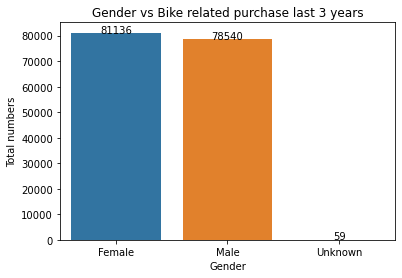

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt


def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')


y =cusdemo_df.groupby('gender')['p3bkrel_pur'].sum().rename('count').reset_index()
sns.barplot(x = 'gender', y = 'count', data= y)
addlabels(y['gender'], y['count'])
plt.title('Gender vs Bike related purchase last 3 years')
plt.xlabel('Gender')
plt.ylabel('Total numbers')

In [7]:
#differentiating age bracket column
import datetime as dt
import numpy as np
cusdemo_df['age'] = ((
    dt.datetime.now() - cusdemo_df['DOB']) / np.timedelta64(1, 'Y')).round(0).astype(int) 
cusdemo_df['age_bracket'] = (
    (round(cusdemo_df['age'] / 10)) * 10).astype(int)

cusdemo_df.head()



,gender,p3bkrel_pur,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_bracket
customer_id,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0,68,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0,41,40
3,Male,61,1954-01-20,Property,Mass Customer,0,1,15.0,68,70
4,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0,60,60
6,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0,55,60


In [8]:
cusadd_df = pd.read_excel('rawdata.xlsx', 'CustomerAddress', index_col=0)
cusadd_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
cusadd_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [10]:
cusadd_df['state'] = cusadd_df['state'].replace(
    {'New South Wales': 'NSW', 'QLD': 'QLD', 'VIC': 'VIC', 'NSW': 'NSW', 'Victoria': 'VIC'})
cusadd_df.head()


,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
df1 = pd.merge(cusdemo_df, cusadd_df, left_index= True, right_index= True )
df1.head()

,gender,p3bkrel_pur,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_bracket,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,0,1,11.0,68,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,0,1,16.0,41,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,0,7.0,60,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,0,1,13.0,55,60,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,0,1,11.0,46,50,4 Delaware Trail,2210,NSW,Australia,9


In [12]:
z = df1.groupby('age_bracket')['state'].value_counts().rename('count').reset_index()
tt = z.groupby('age_bracket')['count'].sum().rename('total').reset_index()

Text(0.5, 0, 'Age Bracket')

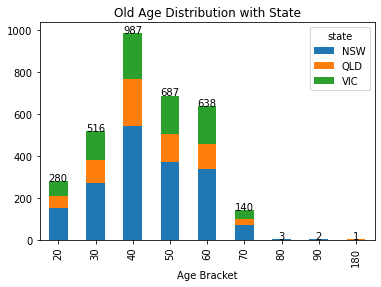

In [13]:
df1.groupby('age_bracket')['state'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(tt['age_bracket'], tt['total'])
plt.title('Old Age Distribution with State')
plt.xlabel('Age Bracket')


Text(0.5, 0, 'Age Bracket')

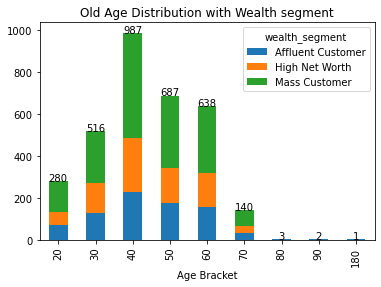

In [14]:
wealth = df1.groupby('age_bracket')['wealth_segment'].value_counts().rename(
    'count').reset_index()
ww = wealth.groupby('age_bracket')['count'].sum().rename('total').reset_index()
df1.groupby('age_bracket')['wealth_segment'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(ww['age_bracket'], ww['total'])
plt.title('Old Age Distribution with Wealth segment')
plt.xlabel('Age Bracket')


Text(0.5, 1.0, 'Old Gender Distribution with Age Bracket')

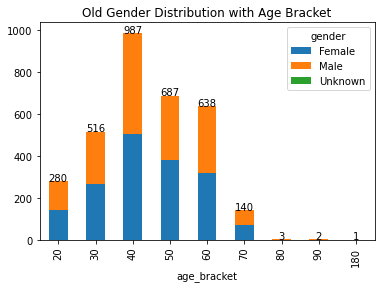

In [15]:
gender = df1.groupby('age_bracket')['gender'].value_counts().rename(
    'count').reset_index()
gg = gender.groupby('age_bracket')['count'].sum().rename('total').reset_index()
df1.groupby('age_bracket')['gender'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(gg['age_bracket'], gg['total'])
plt.title('Old Gender Distribution with Age Bracket')


Text(0.5, 1.0, 'Gender Distribution with Wealth segment')

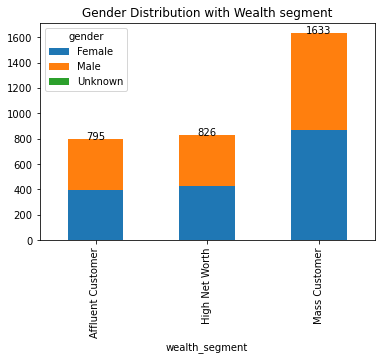

In [16]:
wealth_gender = df1.groupby('wealth_segment')['gender'].value_counts().rename(
    'count').reset_index()
wg = wealth_gender.groupby('wealth_segment')[
    'count'].sum().rename('total').reset_index()
df1.groupby('wealth_segment')['gender'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(wg['wealth_segment'], wg['total'])
plt.title('Gender Distribution with Wealth segment')


Text(0.5, 1.0, 'Gender Distribution with Job industry category')

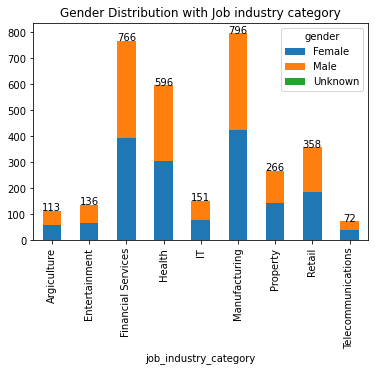

In [17]:
job_cat = df1.groupby('job_industry_category')['gender'].value_counts().rename(
    'count').reset_index()
jc = job_cat.groupby('job_industry_category')[
    'count'].sum().rename('total').reset_index()
df1.groupby('job_industry_category')['gender'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(jc['job_industry_category'], jc['total'])
plt.title('Gender Distribution with Job industry category')


Text(0.5, 1.0, 'Own car Distribution with Job industry category')

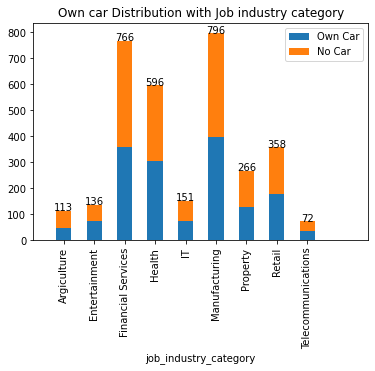

In [18]:
job_car = df1.groupby('job_industry_category')['owns_car'].value_counts().rename(
    'count').reset_index()
jca = job_car.groupby('job_industry_category')[
    'count'].sum().rename('total').reset_index()
df1.groupby('job_industry_category')['owns_car'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(jca['job_industry_category'], jca['total'])
plt.legend(['Own Car', 'No Car'])
plt.xlim([-1, 10])
plt.title('Own car Distribution with Job industry category')


Text(0, 0.5, '')

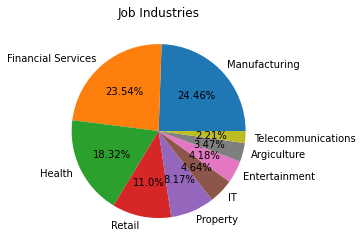

In [19]:
df1['job_industry_category'].value_counts().plot(
    kind='pie', autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Job Industries')
plt.ylabel('')


Text(0, 0.5, '')

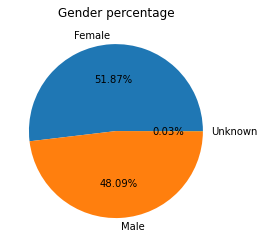

In [20]:
df1['gender'].value_counts().plot(kind='pie', autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Gender percentage')
plt.ylabel('')


In [21]:
df2 = pd.read_excel('rawdata.xlsx', 'NewCustomerList')
df2.head()


/var/folders/25/53b25p9j7k52dz70pl14gl2w0000gn/T/ipykernel_11378/1238392822.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df2 = pd.read_excel('rawdata.xlsx', 'NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.01,1.2625,1.578125,1.341406,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.70,0.7000,0.875000,0.743750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.67,0.6700,0.670000,0.670000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.96,1.2000,1.200000,1.200000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.73,0.7300,0.912500,0.912500,4,4,1.703125


In [22]:
df2.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [23]:
df2.drop(['first_name', 'last_name', 'job_title', 'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
           'Unnamed: 19', 'Unnamed: 20'], axis =1, inplace=True)
df2.rename(columns={'past_3_years_bike_related_purchases': 'p3bkrel_pur'}, inplace=True)
df2['owns_car'] = df2['owns_car'].replace({'Yes': 1, 'No': 0})
df2['deceased_indicator'] = df2['deceased_indicator'].replace({'Y': 1, 'N': 0})
df2.dropna(inplace=True)
df2.head()


,gender,p3bkrel_pur,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,Rank,Value
0,Male,86,1957-07-12,Manufacturing,Mass Customer,0,1,14,45 Shopko Center,4500,QLD,Australia,1,1.718750
1,Male,69,1970-03-22,Property,Mass Customer,0,0,16,14 Mccormick Park,2113,NSW,Australia,1,1.718750
2,Female,10,1974-08-28,Financial Services,Affluent Customer,0,0,10,5 Colorado Crossing,3505,VIC,Australia,1,1.718750
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,0,1,5,207 Annamark Plaza,4814,QLD,Australia,4,1.703125
4,Female,34,1965-09-21,Financial Services,Affluent Customer,0,0,19,115 Montana Place,2093,NSW,Australia,4,1.703125


In [24]:
df2['age'] = ((
    dt.datetime.now() - df2['DOB']) / np.timedelta64(1, 'Y')).round(0).astype(int)
df2['age_bracket'] = (
    (round(df2['age'] / 10)) * 10).astype(int)
df2.head()


,gender,p3bkrel_pur,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,Rank,Value,age,age_bracket
0,Male,86,1957-07-12,Manufacturing,Mass Customer,0,1,14,45 Shopko Center,4500,QLD,Australia,1,1.718750,65,60
1,Male,69,1970-03-22,Property,Mass Customer,0,0,16,14 Mccormick Park,2113,NSW,Australia,1,1.718750,52,50
2,Female,10,1974-08-28,Financial Services,Affluent Customer,0,0,10,5 Colorado Crossing,3505,VIC,Australia,1,1.718750,47,50
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,0,1,5,207 Annamark Plaza,4814,QLD,Australia,4,1.703125,43,40
4,Female,34,1965-09-21,Financial Services,Affluent Customer,0,0,19,115 Montana Place,2093,NSW,Australia,4,1.703125,56,60


Text(0.5, 1.0, 'New Job industry category')

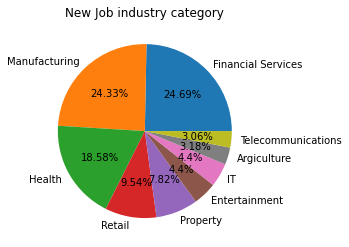

In [25]:
df2['job_industry_category'].value_counts().plot(kind = 'pie', autopct = lambda pct: str(round(pct, 2)) + '%')
plt.ylabel(' ')
plt.title('New Job industry category')

Text(0.5, 1.0, 'New gender percentage')

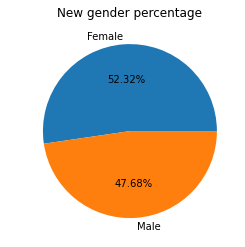

In [26]:
df2['gender'].value_counts().plot(kind = 'pie', autopct = lambda pct: str(round(pct, 2))+ '%')
plt.ylabel(' ')
plt.title('New gender percentage')

Text(0, 0.5, 'Total numbers')

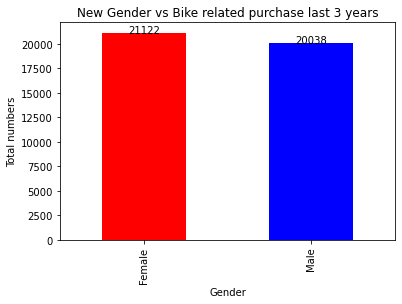

In [27]:
nwpur = df2.groupby('gender')['p3bkrel_pur'].sum().rename('count').reset_index()
df2.groupby('gender')['p3bkrel_pur'].sum().plot(
    kind='bar', stacked=True, color=['red', 'blue'])
addlabels(nwpur['gender'], nwpur['count'])
plt.title('New Gender vs Bike related purchase last 3 years')
plt.xlabel('Gender')
plt.ylabel('Total numbers')



Text(0.5, 0, 'Age Bracket')

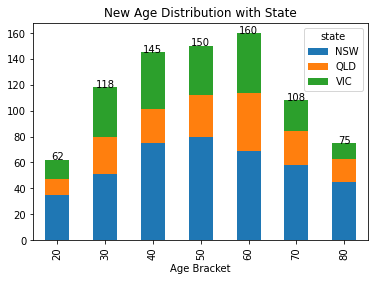

In [28]:
nz = df2.groupby('age_bracket')['state'].value_counts().rename(
    'count').reset_index()
ntt = nz.groupby('age_bracket')['count'].sum().rename('total').reset_index()
df2.groupby('age_bracket')['state'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(ntt['age_bracket'], ntt['total'])
plt.title('New Age Distribution with State')
plt.xlabel('Age Bracket')


Text(0.5, 0, 'Age Bracket')

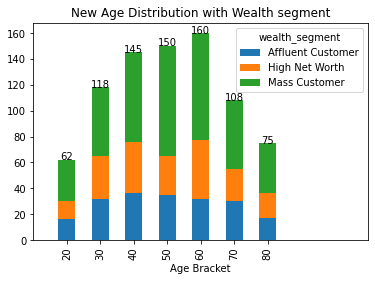

In [29]:
nwealth = df2.groupby('age_bracket')['wealth_segment'].value_counts().rename(
    'count').reset_index()
nww = nwealth.groupby('age_bracket')['count'].sum().rename('total').reset_index()
df2.groupby('age_bracket')['wealth_segment'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(nww['age_bracket'], nww['total'])
plt.title('New Age Distribution with Wealth segment')
plt.xlim(-1, 9)
plt.xlabel('Age Bracket')


Text(0.5, 0, 'Wealth Management')

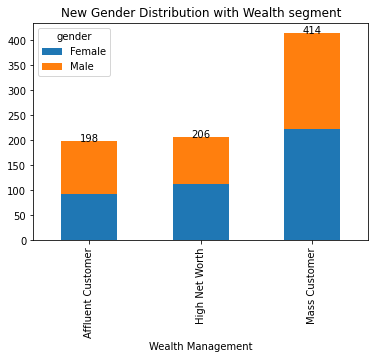

In [30]:
nwealth_gender = df2.groupby('wealth_segment')['gender'].value_counts().rename(
    'count').reset_index()
nwg = nwealth_gender.groupby('wealth_segment')[
    'count'].sum().rename('total').reset_index()
df2.groupby('wealth_segment')['gender'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(nwg['wealth_segment'], nwg['total'])
plt.title('New Gender Distribution with Wealth segment')
plt.xlabel('Wealth Management')


Text(0.5, 0, 'Job industry category')

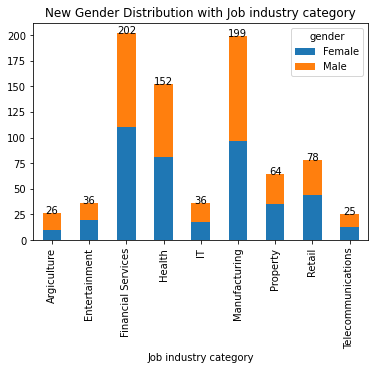

In [31]:
njob_cat = df2.groupby('job_industry_category')['gender'].value_counts().rename(
    'count').reset_index()
njc = njob_cat.groupby('job_industry_category')[
    'count'].sum().rename('total').reset_index()
df2.groupby('job_industry_category')['gender'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(njc['job_industry_category'], njc['total'])
plt.title('New Gender Distribution with Job industry category')
plt.xlabel('Job industry category')


(-1.0, 10.0)

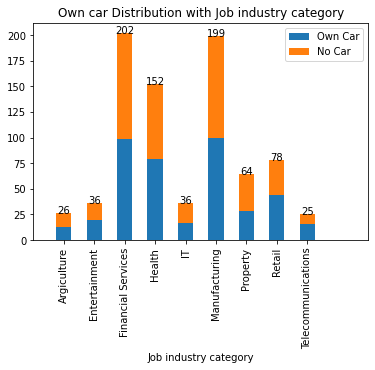

In [32]:
njob_car = df2.groupby('job_industry_category')['owns_car'].value_counts().rename(
    'count').reset_index()
njca = njob_car.groupby('job_industry_category')[
    'count'].sum().rename('total').reset_index()
df2.groupby('job_industry_category')['owns_car'].value_counts().unstack(
    level=1).plot(kind='bar', stacked=True)
addlabels(njca['job_industry_category'], njca['total'])
plt.title('Own car Distribution with Job industry category')
plt.xlabel('Job industry category')
plt.legend(['Own Car', 'No Car'])
plt.xlim([-1, 10])


In [33]:
df2 = df2.sort_values(by = ['p3bkrel_pur'], ascending=False)
df2.head(
         )

df3 = df2.loc[(df2['p3bkrel_pur'] > 90) & (
    df2['gender'] == 'Female') & (df2['state'] == 'NSW') & (df2['p3bkrel_pur'] > 90) & (
        df2['wealth_segment'] == 'Mass Customer') & (df2['age'] > 40) ]
df3.head()


,gender,p3bkrel_pur,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,Rank,Value,age,age_bracket
272,Female,99,1976-08-24,Manufacturing,Mass Customer,0,0,3,88 Mifflin Pass,2529,NSW,Australia,271,1.060000,45,40
546,Female,99,1972-04-27,Financial Services,Mass Customer,0,0,5,0 Kipling Way,2289,NSW,Australia,546,0.823437,50,50
683,Female,98,1978-03-27,Health,Mass Customer,0,1,10,34 Jay Hill,2880,NSW,Australia,684,0.700000,44,40
685,Female,95,1980-04-09,Entertainment,Mass Customer,0,1,3,0 Express Lane,2142,NSW,Australia,684,0.700000,42,40
253,Female,91,1980-09-16,IT,Mass Customer,0,0,9,14709 Portage Avenue,2166,NSW,Australia,252,1.073125,41,40


In [34]:
df1.to_csv('cleaned_dataset.csv')

In [35]:
df3 = pd.read_excel('rawdata.xlsx', 'Transactions')
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [36]:
df3.isna().sum()
#df3.groupby('brand')['standard_cost'].describe()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [37]:
df3.dropna(inplace=True)
df3.shape

(19445, 13)

In [38]:
df3['profit'] = df3['list_price']-df3['standard_cost']
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [39]:
df3 = df3.sort_values(by = ['customer_id'], ascending=True)
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,509.97
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87
15662,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,431.33


<AxesSubplot:ylabel='profit'>

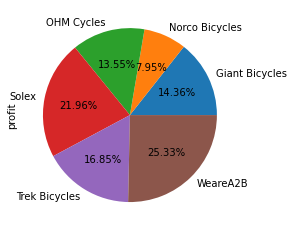

In [47]:
df3.groupby('brand')['profit'].sum().plot(kind = 'pie', autopct = lambda pct: str(round(pct, 2)) +'%')



In [48]:
df3.to_csv('cleaned_transaction.csv')